In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load demo data

df_demo = pd.read_csv("database/df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [4]:
#Load experiment clients

df_clients = pd.read_csv("database/df_final_experiment_clients.txt")
df_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [5]:
df_clients.dtypes

client_id     int64
Variation    object
dtype: object

In [6]:
#Load web data pt1+pt2

df_web = pd.concat([
    pd.read_csv("database/df_final_web_data_pt_1.txt"),
    pd.read_csv("database/df_final_web_data_pt_2.txt")
], ignore_index=True)

df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df_web.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [8]:
# Merge web data with experiment clients

df_analysis = df_web.merge(df_clients, on="client_id", how="left")
df_analysis


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN


**CLEANING 1**

In [9]:
# Analyze distribution of Variation groups

df_analysis["Variation"].value_counts(dropna=False)


Variation
NaN        434096
Test       177847
Control    143462
Name: count, dtype: int64

In [10]:
#1st : Select only experiment clients

df_analysis = df_analysis[df_analysis["Variation"].notna()]

df_analysis["Variation"].value_counts(dropna=False)

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [11]:
#Merge with demo data

df_analysis = df_analysis.merge(df_demo, on="client_id", how="left")

df_analysis

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


**CLEANING 2**

In [12]:
#check nulls in each column

df_analysis.isnull().sum()

client_id             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
Variation             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
dtype: int64

In [13]:
#Drop rows with nulls in 'age' column

df_analysis = df_analysis[df_analysis["clnt_age"].notna()]
df_analysis.isnull().sum()

client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [14]:
df_analysis.dtypes

client_id             int64
visitor_id           object
visit_id             object
process_step         object
date_time            object
Variation            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

**FORMATTING DATAFRAME**

In [15]:
#1) Convert to interger: clnt_tenure_yr, clnt_tenure_mnth, clnt_age, num_accts, bal, calls_6:mnth, logons_6_mnth

df_analysis["clnt_tenure_yr"] = df_analysis["clnt_tenure_yr"].astype(int)
df_analysis["clnt_tenure_mnth"] = df_analysis["clnt_tenure_mnth"].astype(int)
df_analysis["clnt_age"] = df_analysis["clnt_age"].astype(int)
df_analysis["num_accts"] = df_analysis["num_accts"].astype(int)
df_analysis["bal"] = df_analysis["bal"].astype(int)
df_analysis["calls_6_mnth"] = df_analysis["calls_6_mnth"].astype(int)
df_analysis["logons_6_mnth"] = df_analysis["logons_6_mnth"].astype(int)


C:\Users\marle\AppData\Local\Temp\ipykernel_12452\2075129781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["clnt_tenure_yr"] = df_analysis["clnt_tenure_yr"].astype(int)
C:\Users\marle\AppData\Local\Temp\ipykernel_12452\2075129781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["clnt_tenure_mnth"] = df_analysis["clnt_tenure_mnth"].astype(int)
C:\Users\marle\AppData\Local\Temp\ipykernel_12452\2075129781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [16]:
#2) Convert to datetime: date_time

df_analysis["date_time"] = pd.to_datetime(df_analysis["date_time"], errors="coerce")


C:\Users\marle\AppData\Local\Temp\ipykernel_12452\2372770469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["date_time"] = pd.to_datetime(df_analysis["date_time"], errors="coerce")


In [17]:
df_analysis.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                          int64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

**DATAFRAME ORIGINAL: demo + experiment clients + web data (1-2)**

In [18]:
df_analysis

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,U,2,189023,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,U,2,189023,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,U,2,189023,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,U,2,189023,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,U,2,189023,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,U,2,153238,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,M,3,141808,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,M,3,141808,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,M,3,141808,6,9


In [19]:
#nunique values in each column

for col in df_analysis.columns:
    print(f"\n{col}")
    print(df_analysis[col].unique())



client_id
[9988021 8320017 4033851 ...  433098 1574008 2908510]

visitor_id
['580560515_7732621733' '39393514_33118319366' '762728880_76361333336' ...
 '5505424_50616523266' '117364417_77840596075' '814969699_90652851448']

visit_id
['781255054_21935453173_531117' '960651974_70596002104_312201'
 '949661017_22392791362_127391' ... '412278907_8949064401_171038'
 '528720790_71583064618_169151' '562606085_36368381773_92090']

process_step
['step_3' 'step_2' 'step_1' 'start' 'confirm']

date_time
<DatetimeArray>
['2017-04-17 15:27:07', '2017-04-17 15:26:51', '2017-04-17 15:19:22',
 '2017-04-17 15:19:13', '2017-04-17 15:18:04', '2017-04-17 15:17:15',
 '2017-04-17 15:17:01', '2017-04-17 15:16:22', '2017-04-05 13:10:05',
 '2017-04-05 13:09:43',
 ...
 '2017-05-20 23:07:09', '2017-05-06 23:51:05', '2017-05-06 23:50:40',
 '2017-05-06 23:43:47', '2017-05-06 23:43:34', '2017-05-06 23:43:27',
 '2017-05-10 22:57:17', '2017-05-10 22:56:31', '2017-05-10 22:56:23',
 '2017-05-10 22:56:20']
Length: 28325

**CLEANING 3 - Remove duplicated "confirm"**

In [20]:
#Check how many 'confirm' process steps per visit_id

df_analysis[df_analysis["process_step"] == "confirm"] \
    .groupby("visit_id") \
    .size() \
    .sort_values(ascending=False) 


visit_id
115772476_64303792531_611679    16
817562193_57472961580_383121    16
155305468_93296256914_310722    11
820090283_58581376462_851669    10
98898082_53766652112_934197      9
                                ..
100608591_65788886975_921579     1
10056419_61656665964_803695      1
100559681_42553631610_873319     1
999971096_28827267783_236076     1
999891710_95999857132_598498     1
Length: 37667, dtype: int64

In [21]:
#Create mask for 'confirm' process step
mask_confirm = df_analysis["process_step"].eq("confirm")

In [22]:
df_analysis_original = df_analysis.copy()

In [23]:
# 1) visit_id con confirm duplicado
visits_with_dup_confirm = (
    df_analysis.loc[mask_confirm]
    .groupby("visit_id")
    .size()
    .loc[lambda s: s > 1]
    .index)


# 2) "confirm" más antiguo por visit_id (solo para visitas con duplicados)
confirms_sorted = (
    df_analysis.loc[mask_confirm & df_analysis["visit_id"].isin(visits_with_dup_confirm)]
    .sort_values(["visit_id", "date_time"], kind="mergesort"))

idx_keep_oldest_confirm = confirms_sorted.groupby("visit_id", sort=False).head(1).index


# 3) Drop re-confirm duplicates, keeping only the oldest one

df_analysis = (
    df_analysis[
        (~mask_confirm) |
        (mask_confirm & ~df_analysis["visit_id"].isin(visits_with_dup_confirm)) |
        (mask_confirm & df_analysis["visit_id"].isin(visits_with_dup_confirm) & df_analysis.index.isin(idx_keep_oldest_confirm))
    ]
    .sort_values(["visit_id", "date_time"], kind="mergesort")
    .reset_index(drop=True)
)


df_analysis


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,56,59,U,2,63130,6,9
1,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7,88,23,M,2,26436,6,9
2,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7,88,23,M,2,26436,6,9
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7,88,23,M,2,26436,6,9
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,7,88,23,M,2,26436,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18,227,58,F,2,1056775,6,9
315644,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18,227,58,F,2,1056775,6,9
315645,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18,227,58,F,2,1056775,6,9
315646,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18,227,58,F,2,1056775,6,9


In [24]:
#Check removed confirms

removed_confirms = df_analysis_original.loc[
    mask_confirm &
    df_analysis_original["visit_id"].isin(visits_with_dup_confirm) &
    ~df_analysis_original.index.isin(idx_keep_oldest_confirm)
].sort_values(["visit_id", "date_time"], kind="mergesort")

removed_confirms



,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106862,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4,56,59,U,2,63130,6,9
213590,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:16,Test,3,47,67,U,2,329512,3,6
213589,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:32,Test,3,47,67,U,2,329512,3,6
204183,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:39:44,Test,5,60,23,U,4,129516,6,9
204182,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:40:26,Test,5,60,23,U,4,129516,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59227,8432798,397079791_56213848572,999066804_34223271414_790731,confirm,2017-04-25 16:00:19,Test,15,181,51,M,3,1878607,4,7
206048,1427054,852434665_51860680026,999522487_18357180783_393962,confirm,2017-04-02 19:15:45,Test,4,56,32,U,2,45622,5,8
110664,426074,971489883_58289393614,999841812_92641758733_294220,confirm,2017-04-05 11:54:37,Test,5,65,57,U,3,57362,4,7
181092,9498187,599653496_46358190244,999954858_74676709104_879685,confirm,2017-04-05 11:15:41,Test,5,60,21,U,2,31295,6,9


In [25]:
#Check kept confirms

kept_confirms = df_analysis_original.loc[
    mask_confirm &
    df_analysis_original.index.isin(idx_keep_oldest_confirm)
].sort_values(["visit_id", "date_time"], kind="mergesort")

kept_confirms

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106863,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,56,59,U,2,63130,6,9
213591,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:48:24,Test,3,47,67,U,2,329512,3,6
204184,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:39:22,Test,5,60,23,U,4,129516,6,9
182081,2060326,719485762_12608113429,100844233_60058998075_722846,confirm,2017-04-03 12:29:44,Test,7,85,31,U,2,51028,6,9
37226,7795550,370148491_10861944232,101351075_24045289214_506540,confirm,2017-04-18 20:37:20,Test,7,88,25,U,2,62271,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59228,8432798,397079791_56213848572,999066804_34223271414_790731,confirm,2017-04-25 15:59:17,Test,15,181,51,M,3,1878607,4,7
206049,1427054,852434665_51860680026,999522487_18357180783_393962,confirm,2017-04-02 19:14:33,Test,4,56,32,U,2,45622,5,8
110665,426074,971489883_58289393614,999841812_92641758733_294220,confirm,2017-04-05 11:53:35,Test,5,65,57,U,3,57362,4,7
181093,9498187,599653496_46358190244,999954858_74676709104_879685,confirm,2017-04-05 11:14:59,Test,5,60,21,U,2,31295,6,9


In [26]:
#Summary of removed confirms per visit_id

check_summary = (
    removed_confirms
    .groupby("visit_id")
    .size()
    .reset_index(name="n_removed_confirms")
    .sort_values("n_removed_confirms", ascending=False)
)

check_summary.head(10)

,visit_id,n_removed_confirms
2982,817562193_57472961580_383121,15
62,115772476_64303792531_611679,15
240,155305468_93296256914_310722,10
2992,820090283_58581376462_851669,9
1680,50537501_11478756856_509628,8
3050,834703874_81652602361_748606,8
3288,888059775_41615184565_735869,8
3691,98898082_53766652112_934197,8
3129,856744918_82226240089_522059,8
993,335289108_14602916439_341661,7


**VALIDATION OF DUPLICATED CONFIRM REMOVED**

In [27]:
#validación "duplicated confirm" process steps removed

visit_example = "817562193_57472961580_383121"

df_analysis_original[df_analysis_original["visit_id"] == visit_example].sort_values("date_time")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
269967,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269968,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269969,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269970,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269971,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269972,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269973,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269974,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269959,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:20:16,Test,9,113,77,M,2,155969,6,9
269960,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:20:16,Test,9,113,77,M,2,155969,6,9


In [28]:
#Check example
df_analysis[
    df_analysis["visit_id"] == visit_example
].sort_values("date_time")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
251847,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9


**CLEANING 4 - Duplicated visit_id in different client_id**

In [29]:
rows_before = len(df_analysis)
visits_before = df_analysis["visit_id"].nunique()


In [30]:
# visit_id con más de un client_id
conflicts = (
    df_analysis.groupby("visit_id")["client_id"]
    .nunique()
    .reset_index(name="n_client_ids")
    .query("n_client_ids > 1")
)

conflict_visit_ids = set(conflicts["visit_id"])

print("visit_id conflictivos:", len(conflict_visit_ids))
conflicts.head()

visit_id conflictivos: 236


,visit_id,n_client_ids
144,102039130_96083762708_562998,2
286,103844930_39480104147_119972,2
531,107090185_43642799759_974372,2
968,112254779_47535940518_581091,2
1377,117623083_28983793422_368850,2


In [31]:
#drop all visit_id with more than one client_id

df_analysis = df_analysis[~df_analysis["visit_id"].isin(conflict_visit_ids)].copy()


#check that no visit_id has more than one client_id

df_analysis.groupby("visit_id")["client_id"].nunique().max()



np.int64(1)

In [32]:
#Summary of cleaning

rows_after = len(df_analysis)
visits_after = df_analysis["visit_id"].nunique()

rows_dropped = rows_before - rows_after
visits_dropped = visits_before - visits_after

print("Rows dropped:", rows_dropped)
print("Visits dropped:", visits_dropped)

print("Rows after cleaning:", rows_after)
print("Distinct visits after cleaning:", visits_after)


Rows dropped: 2529
Visits dropped: 236
Rows after cleaning: 313119
Distinct visits after cleaning: 68947


In [33]:
#Export cleaned analysis dataframe for PowerBI analysis

df_analysis.to_csv("df_analysis_clean_for_power_bi (1).csv", index=False)

In [34]:
df_analysis

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,56,59,U,2,63130,6,9
1,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7,88,23,M,2,26436,6,9
2,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7,88,23,M,2,26436,6,9
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7,88,23,M,2,26436,6,9
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,7,88,23,M,2,26436,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18,227,58,F,2,1056775,6,9
315644,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18,227,58,F,2,1056775,6,9
315645,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18,227,58,F,2,1056775,6,9
315646,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18,227,58,F,2,1056775,6,9


**Hipotesis 1 - conversion rate**

- Total visits = number of unique visit_id per variation

- Converted visits = number of visit_id that reach process_step = 'confirm'

- Conversion rate = converted visits / total visits

This hypothesis evaluates whether the conversion rate differs between the Control and Test variations.


In [35]:
# Crear columna date a partir de date_time

df_analysis["date"] = pd.to_datetime(df_analysis["date_time"]).dt.date


In [36]:
#HIPOTESIS 1: Conversion rate per day in Test vs. Control

# Mask confirm
mask_confirm = df_analysis["process_step"].eq("confirm")

# Total de visitas por variation & date_time
daily_visits = (
    df_analysis
    .groupby(["date", "Variation"])["visit_id"]
    .nunique()
    .reset_index(name="total_visits"))


# Visitas con confirm por variation & date_time
daily_converted = (
    df_analysis.loc[mask_confirm]
    .groupby(["date", "Variation"])["visit_id"]
    .nunique()
    .reset_index(name="converted_visits"))


# Unir y calcular conversion rate
daily_conversion = (
    daily_visits
    .merge(daily_converted, on=["date", "Variation"], how="left")
    .fillna({"converted_visits": 0})
)

daily_conversion["conversion_rate"] = (daily_conversion["converted_visits"] / daily_conversion["total_visits"]* 100).round(2)

#FINAL DATAFRAME H1 - Analyze conversion rate per day
daily_conversion

,date,Variation,total_visits,converted_visits,conversion_rate
0,2017-03-15,Control,121,77,63.64
1,2017-03-15,Test,146,87,59.59
2,2017-03-16,Control,47,23,48.94
3,2017-03-16,Test,56,35,62.50
4,2017-03-17,Control,24,10,41.67
...,...,...,...,...,...
191,2017-06-18,Test,131,70,53.44
192,2017-06-19,Control,186,100,53.76
193,2017-06-19,Test,163,94,57.67
194,2017-06-20,Control,222,125,56.31


**Hypothesis 2 – Time to Conversion**

Total purchase process time from the user’s first entry until final conversion.

This metric does not measure funnel efficiency; it captures the overall conversion experience, reflecting how long it takes a user to complete the full journey until conversion.

In [37]:
#HIPOTESIS 2: Average time to convert in Test vs. Control

# Timestamp de start por visita
start_times = (
    df_analysis[df_analysis["process_step"] == "start"]
    .groupby("visit_id")["date_time"]
    .min()
    .reset_index(name="start_time")
)

# Timestamp de confirm por visita
confirm_times = (
    df_analysis[df_analysis["process_step"] == "confirm"]
    .groupby("visit_id")["date_time"]
    .min()
    .reset_index(name="confirm_time")
)

# Unir start y confirm
funnel_time = (
    start_times
    .merge(confirm_times, on="visit_id", how="inner")  # only visits that converted
)

funnel_time["time_to_confirm_min"] = (
    (funnel_time["confirm_time"] - funnel_time["start_time"])
    .dt.total_seconds() / 60
).round(2)


funnel_time

,visit_id,start_time,confirm_time,time_to_confirm_min
0,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03
1,100022086_87870757897_149620,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00
2,10006594_66157970412_679648,2017-04-13 11:50:18,2017-04-13 11:56:12,5.90
3,10007589_47780784567_391490,2017-05-18 07:51:32,2017-05-18 08:03:33,12.02
4,100173292_91322748906_143563,2017-04-25 10:28:55,2017-04-25 10:30:30,1.58
...,...,...,...,...
32476,999958344_67534252886_39917,2017-04-15 00:34:32,2017-04-15 00:35:54,1.37
32477,999971096_28827267783_236076,2017-04-13 10:31:49,2017-04-13 10:34:08,2.32
32478,999976049_95772503197_182554,2017-04-04 12:50:10,2017-04-04 13:02:18,12.13
32479,999984454_18731538378_781808,2017-03-29 11:18:33,2017-03-29 11:21:07,2.57


In [38]:
# Map visit_id -> variation (una fila por visita)
variation_map = (
    df_analysis[["visit_id", "Variation"]]
    .drop_duplicates(subset=["visit_id"])
)

# Añadir variation a tus dataframes de funnel
funnel_time = funnel_time.merge(variation_map, on="visit_id", how="left")

In [39]:
#Cálculo de cuartiles e IQR
Q1 = funnel_time["time_to_confirm_min"].quantile(0.25)
Q3 = funnel_time["time_to_confirm_min"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(2.65),
 np.float64(7.27),
 np.float64(4.619999999999999),
 0,
 np.float64(14.2))

In [40]:
#Identificación de outliers (sin eliminar)
funnel_time["is_outlier"] = (
    (funnel_time["time_to_confirm_min"] < lower_bound) |
    (funnel_time["time_to_confirm_min"] > upper_bound)
)

funnel_time["is_outlier"].value_counts()

is_outlier
False    29761
True      2720
Name: count, dtype: int64

In [41]:
#Upper bound outliers
funnel_time[funnel_time["is_outlier"]] \
    .sort_values("time_to_confirm_min", ascending=False) \
    .head(10)

,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
14491,501042989_50588313479_700675,2017-04-12 11:06:37,2017-04-12 16:06:52,300.25,Test,True
17651,588904389_16165570985_286826,2017-06-03 08:52:25,2017-06-03 13:36:57,284.53,Control,True
19076,627596734_90499955288_891366,2017-06-05 13:40:27,2017-06-05 16:49:38,189.18,Control,True
784,121539902_39215756141_237356,2017-04-14 15:12:53,2017-04-14 17:26:18,133.42,Test,True
29567,917141167_79903154820_914408,2017-04-14 14:21:21,2017-04-14 16:33:48,132.45,Control,True
12142,437446967_60745740605_562480,2017-04-19 12:23:06,2017-04-19 14:25:10,122.07,Test,True
31713,978759989_20162934414_194885,2017-04-16 09:08:34,2017-04-16 11:05:55,117.35,Test,True
28650,89076580_51739503136_236731,2017-04-05 16:04:53,2017-04-05 17:59:02,114.15,Control,True
31731,979123181_47185056640_501726,2017-04-12 15:50:36,2017-04-12 17:40:08,109.53,Control,True
18176,602830065_65703315740_227601,2017-05-03 01:48:40,2017-05-03 03:34:07,105.45,Test,True


In [42]:
#Lower bound outliers
funnel_time[funnel_time["is_outlier"]] \
    .sort_values("time_to_confirm_min") \
    .head(10)

,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
27480,859021479_20735840526_147089,2017-03-31 09:31:39,2017-03-31 08:06:49,-84.83,Test,True
22281,715638933_30287458218_479519,2017-04-13 09:24:20,2017-04-13 08:52:19,-32.02,Test,True
2764,175695329_63350883005_788101,2017-04-24 15:52:04,2017-04-24 15:21:45,-30.32,Control,True
29780,923209093_52642149345_96302,2017-04-10 21:57:21,2017-04-10 21:30:07,-27.23,Control,True
1137,130713883_47793575014_500286,2017-05-01 11:43:22,2017-05-01 11:18:16,-25.10,Test,True
15881,53999699_45260641588_941622,2017-04-12 16:11:23,2017-04-12 15:47:07,-24.27,Test,True
30953,957381536_58687633093_962170,2017-05-29 14:04:20,2017-05-29 13:48:14,-16.10,Test,True
1519,140561335_98036733967_158129,2017-05-14 20:46:44,2017-05-14 20:30:43,-16.02,Test,True
18380,608878385_51120543756_227552,2017-04-14 12:08:03,2017-04-14 11:53:54,-14.15,Control,True
17880,595361025_24882758840_794745,2017-04-17 15:06:37,2017-04-17 14:53:55,-12.70,Test,True


In [43]:
#remove outliers above 0 minutes and disregarding top 25% longer process times
funnel_time_iqr = funnel_time[
    (funnel_time["time_to_confirm_min"] >= lower_bound) &
    (funnel_time["time_to_confirm_min"] <= upper_bound)
].copy()


#FINAL DATAFRAME H2 - Analyze average time to convert without outliers
funnel_time_iqr


,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
0,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03,Test,False
1,100022086_87870757897_149620,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00,Test,False
2,10006594_66157970412_679648,2017-04-13 11:50:18,2017-04-13 11:56:12,5.90,Control,False
3,10007589_47780784567_391490,2017-05-18 07:51:32,2017-05-18 08:03:33,12.02,Control,False
4,100173292_91322748906_143563,2017-04-25 10:28:55,2017-04-25 10:30:30,1.58,Test,False
...,...,...,...,...,...,...
32475,999954858_74676709104_879685,2017-04-05 11:13:34,2017-04-05 11:14:59,1.42,Test,False
32476,999958344_67534252886_39917,2017-04-15 00:34:32,2017-04-15 00:35:54,1.37,Test,False
32477,999971096_28827267783_236076,2017-04-13 10:31:49,2017-04-13 10:34:08,2.32,Test,False
32478,999976049_95772503197_182554,2017-04-04 12:50:10,2017-04-04 13:02:18,12.13,Test,False


In [44]:
#summary H2

summary_h2 = (
    funnel_time_iqr
    .groupby("Variation")["time_to_confirm_min"]
    .agg(
        visits="count",
        avg_min="mean",
        median_min="median"
    )
    .reset_index()
)

summary_h2[["avg_min", "median_min"]] = summary_h2[["avg_min", "median_min"]].round(2)
summary_h2

,Variation,visits,avg_min,median_min
0,Control,13498,5.01,4.23
1,Test,16263,4.56,3.67


**Hypothesis 3 – Client Behaviour Analysis**

User navigation behaviour throughout the digital process differs between the Control and Test variations.

This hypothesis doesn't focus on conversion speed or funnel efficiency; it examines the structure and patterns of user journeys. Capturing how users move through the process and whether the new experience leads to more direct and less fragmented navigation paths.

In [45]:
#HIPOTESIS 3: Client behaviour analysis

df = df_analysis.copy()

#Type of TOP N steps to analyze
TOP_N = 20

# Order events correctly
df = df.sort_values(["visit_id", "date_time"])

#Create step sequences as journeys
journeys = (
    df.groupby(["visit_id", "Variation"])["process_step"]
      .apply(list)
      .reset_index(name="journey")
)

journeys["journey_tuple"] = journeys["journey"].apply(tuple)

journeys

,visit_id,Variation,journey,journey_tuple
0,100012776_37918976071_457913,Test,[confirm],"(confirm,)"
1,100019538_17884295066_43909,Test,"[start, step_1, step_2, step_1, step_1, start,...","(start, step_1, step_2, step_1, step_1, start,..."
2,100022086_87870757897_149620,Test,"[start, step_1, step_2, step_3, confirm]","(start, step_1, step_2, step_3, confirm)"
3,100030127_47967100085_936361,Control,[start],"(start,)"
4,100037962_47432393712_705583,Control,"[start, start, step_1, start]","(start, start, step_1, start)"
...,...,...,...,...
68942,999971096_28827267783_236076,Test,"[start, step_1, step_1, step_2, step_3, confirm]","(start, step_1, step_1, step_2, step_3, confirm)"
68943,999976049_95772503197_182554,Test,"[start, step_1, step_2, step_3, step_3, confirm]","(start, step_1, step_2, step_3, step_3, confirm)"
68944,999984454_18731538378_781808,Test,"[start, step_1, step_2, step_3, confirm]","(start, step_1, step_2, step_3, confirm)"
68945,999985675_64610694964_443659,Control,"[start, step_1, step_2, step_3, confirm]","(start, step_1, step_2, step_3, confirm)"


In [46]:
# 2) Count journeys by variation
journey_by_var = (
    journeys.groupby(["journey_tuple", "Variation"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Asegurar columnas aunque falte alguna en datos
for col in ["Control", "Test"]:
    if col not in journey_by_var.columns:
        journey_by_var[col] = 0

# 3) Total y selección Top N
journey_by_var["total"] = journey_by_var["Control"] + journey_by_var["Test"]
journey_by_var = journey_by_var.sort_values("total", ascending=False).head(TOP_N)

# 4) % dentro de cada variation (para comparabilidad)
journey_by_var["Control_pct"] = (journey_by_var["Control"] / journey_by_var["Control"].sum()).round(2)
journey_by_var["Test_pct"] = (journey_by_var["Test"] / journey_by_var["Test"].sum()).round(2)

# 5) Formato legible
journey_by_var["journey_str"] = journey_by_var["journey_tuple"].apply(lambda x: " → ".join(x))

# 6) Difference beteween Test and Control in percentage points
journey_by_var["delta_pct_points"] = (journey_by_var["Test_pct"] - journey_by_var["Control_pct"]).round(2)

# 7) Output final (ordenado por mayor diferencia)
result_top_journeys = (
    journey_by_var[["journey_str", "Control", "Test", "total", "Control_pct", "Test_pct", "delta_pct_points"]]
    .sort_values("delta_pct_points", ascending=False)
)

result_top_journeys

Variation,journey_str,Control,Test,total,Control_pct,Test_pct,delta_pct_points
0,confirm,760,3358,4118,0.03,0.12,0.09
2310,start → step_1 → step_2 → step_3 → confirm,9306,11600,20906,0.37,0.41,0.04
1332,start → step_1 → start → step_1 → step_2 → ste...,281,1110,1391,0.01,0.04,0.03
2348,start → step_1 → step_2 → step_3 → start,193,566,759,0.01,0.02,0.01
3444,step_3 → confirm,123,187,310,0.00,0.01,0.01
1596,start → step_1 → step_1 → step_2 → step_3 → co...,117,275,392,0.00,0.01,0.01
982,start → step_1 → start,291,600,891,0.01,0.02,0.01
18,start → start → start,301,569,870,0.01,0.02,0.01
1657,start → step_1 → step_2 → start,136,446,582,0.01,0.02,0.01
386,start → start → start → step_1 → step_2 → step...,172,390,562,0.01,0.01,0.00


**HIPOTESIS 4 - Client Segmentation Analysis**

User engagement, measured as time spent on visit, varies across age groups and gender segments.
This hypothesis evaluates whether demographic characteristics influence browsing behavior, identifying segments with longer, more exploratory navigation patterns.

In [47]:
#HIPOTESIS 4: cLIENT SEGMENTATION

# Compute visit-level duration (min)
# Group by visit_id and take min/max timestamps to measure time spent in that visit
visit_times = (
    df_analysis
    .groupby(['visit_id', 'client_id', 'Variation', 'gendr', 'clnt_age'])['date_time']
    .agg(['min', 'max'])
    .reset_index()
)
visit_times = visit_times.rename(columns={'min': 'start_time', 'max': 'end_time'})
visit_times['time_on_visit_min'] = ((visit_times['end_time'] - visit_times['start_time']).dt.total_seconds() / 60).round(2)

# remove negative durations if any (defensive)
visit_times = visit_times[visit_times['time_on_visit_min'] >= 0].copy()
visit_times.head()

,visit_id,client_id,Variation,gendr,clnt_age,start_time,end_time,time_on_visit_min
0,100012776_37918976071_457913,3561384,Test,U,59,2017-04-26 13:22:17,2017-04-26 13:22:17,0.00
1,100019538_17884295066_43909,7338123,Test,M,23,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03
2,100022086_87870757897_149620,2478628,Test,F,47,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00
3,100030127_47967100085_936361,105007,Control,F,35,2017-03-22 11:07:49,2017-03-22 11:07:49,0.00
4,100037962_47432393712_705583,5623007,Control,M,78,2017-04-14 16:41:51,2017-04-14 16:44:03,2.20


In [48]:
# Create age bins for segmentation and summarize by age bin
age_bins = [0, 24, 34, 44, 54, 64, 120]
age_labels = ['<=24','25-34','35-44','45-54','55-64','65+']
visit_times['clnt_age_bin'] = pd.cut(visit_times['clnt_age'], bins=age_bins, labels=age_labels)

summary_by_age = (
    visit_times
    .groupby('clnt_age_bin')['time_on_visit_min']
    .agg(['count','mean','median','std'])
    .rename(columns={'count':'visits','mean':'avg_min','median':'median_min','std':'std_min'})
    .reset_index()
)
summary_by_age['avg_min'] = summary_by_age['avg_min'].round(2)
summary_by_age['median_min'] = summary_by_age['median_min'].round(2)

summary_by_age

C:\Users\marle\AppData\Local\Temp\ipykernel_12452\273930285.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('clnt_age_bin')['time_on_visit_min']


,clnt_age_bin,visits,avg_min,median_min,std_min
0,<=24,4168,3.79,2.30,6.383127
1,25-34,13178,3.73,2.27,6.242968
2,35-44,10877,4.11,2.50,7.615948
3,45-54,13324,5.06,3.00,11.249502
4,55-64,15628,5.51,3.13,8.948764
5,65+,11772,5.24,2.58,8.976271


In [49]:
# Summarize by gender (gendr)
summary_by_gender = (
    visit_times
    .groupby('gendr')['time_on_visit_min']
    .agg(['count','mean','median','std'])
    .rename(columns={'count':'visits','mean':'avg_min','median':'median_min','std':'std_min'})
    .reset_index()
)
summary_by_gender['avg_min'] = summary_by_gender['avg_min'].round(2)
summary_by_gender

,gendr,visits,avg_min,median_min,std_min
0,F,22492,4.77,2.60,8.362757
1,M,23615,4.72,2.72,7.819036
2,U,22838,4.65,2.62,9.856032
3,X,2,2.95,2.95,2.828427


In [50]:
# Basic statistical test between genders

# We'll try Mann-Whitney U (non-parametric). If scipy is not available, report that fact.
male = visit_times.loc[visit_times['gendr'] == 'M', 'time_on_visit_min'].dropna()
female = visit_times.loc[visit_times['gendr'] == 'F', 'time_on_visit_min'].dropna()

try:
    from scipy import stats
    has_scipy = True
except Exception:
    has_scipy = False

test_result = {}
if has_scipy and len(male) > 0 and len(female) > 0:
    try:
        u_stat, p_val = stats.mannwhitneyu(male, female, alternative='two-sided')
        test_result = {'test': 'mannwhitneyu', 'u_stat': float(u_stat), 'p_value': float(p_val)}
    except Exception:
        try:
            t_stat, p_val = stats.ttest_ind(male, female, equal_var=False, nan_policy='omit')
            test_result = {'test': 'ttest_ind', 't_stat': float(t_stat), 'p_value': float(p_val)}
        except Exception as e:
            test_result = {'error': str(e)}
else:
    test_result = {'error': 'scipy not available or one of the gender groups is empty'}

test_result

{'test': 'mannwhitneyu', 'u_stat': 267024748.0, 'p_value': 0.30839168052442056}

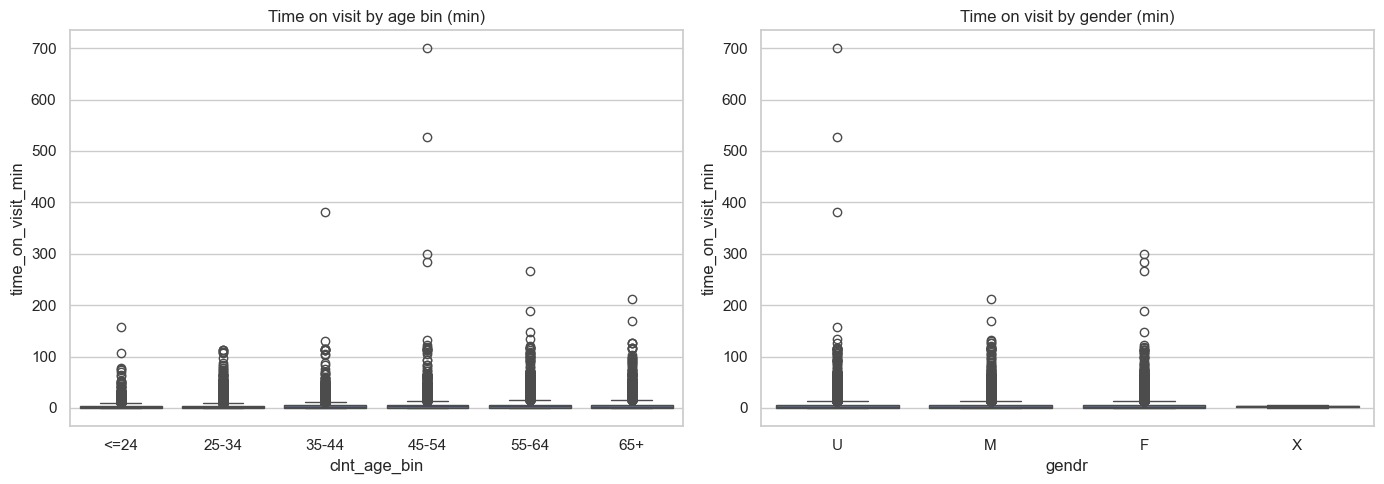

In [51]:
# Boxplots to visualize distribution of time_on_visit by age bin and gender

try:
    import seaborn as sns
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(x='clnt_age_bin', y='time_on_visit_min', data=visit_times, ax=axes[0])
    axes[0].set_title('Time on visit by age bin (min)')
    sns.boxplot(x='gendr', y='time_on_visit_min', data=visit_times, ax=axes[1])
    axes[1].set_title('Time on visit by gender (min)')
    plt.tight_layout()
    plt.show()
except Exception:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    visit_times.boxplot(column='time_on_visit_min', by='clnt_age_bin', ax=axes[0])
    axes[0].set_title('Time on visit by age bin (min)')
    axes[0].set_xlabel('age bin')
    visit_times.boxplot(column='time_on_visit_min', by='gendr', ax=axes[1])
    axes[1].set_title('Time on visit by gender (min)')
    axes[1].set_xlabel('gender')
    plt.suptitle('')
    plt.tight_layout()

plt.show()

**OPTIONALLY. Unified database 2 for Power BI**

In [52]:
#Single visit-level table for Power BI (1 row per visit_id)

df = df_analysis.copy()
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.sort_values(["visit_id", "date_time"])

# 1) Ensure ONE Variation per visit_id (use mode in case of noisy tracking)
variation_by_visit = (
    df.groupby("visit_id")["Variation"]
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
      .reset_index()
)

# 2) Start and Confirm timestamps per visit
start_times = (
    df[df["process_step"] == "start"]
    .groupby("visit_id")["date_time"].min()
    .reset_index(name="start_time")
)

confirm_times = (
    df[df["process_step"] == "confirm"]
    .groupby("visit_id")["date_time"].min()
    .reset_index(name="confirm_time")
)

# 3) Build visit-level base table
visits = (
    variation_by_visit
    .merge(start_times, on="visit_id", how="left")
    .merge(confirm_times, on="visit_id", how="left")
)

# Conversion flag
visits["converted"] = visits["confirm_time"].notna().astype(int)

# Consistent date for daily conversion (use first entry/start date)
visits["start_date"] = visits["start_time"].dt.date

# 4) Time to confirm (minutes) for converted visits
visits["time_to_confirm_min"] = np.where(
    visits["converted"] == 1,
    (visits["confirm_time"] - visits["start_time"]).dt.total_seconds() / 60,
    np.nan
)

# 5) Outlier flag using IQR (only among converted visits)
ttc = visits.loc[visits["converted"] == 1, "time_to_confirm_min"].dropna()
Q1, Q3 = ttc.quantile(0.25), ttc.quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

visits["is_outlier_time"] = np.where(
    visits["converted"] == 1,
    (visits["time_to_confirm_min"] < lower_bound) | (visits["time_to_confirm_min"] > upper_bound),
    False
)

# Clean time metric (set to NaN if outlier)
visits["time_to_confirm_min_clean"] = visits["time_to_confirm_min"].where(~visits["is_outlier_time"], np.nan)

# 6) Build journeys (full sequence of steps) per visit
journeys = (
    df.groupby("visit_id")["process_step"]
      .apply(list)
      .reset_index(name="journey")
)

journeys["journey_str"] = journeys["journey"].apply(lambda x: " → ".join(x))
journeys["num_steps"] = journeys["journey"].apply(len)
journeys["repeats"] = journeys["num_steps"] - journeys["journey"].apply(lambda x: len(set(x)))

# 7) Final single table for Power BI
df_powerbi_visits = visits.merge(
    journeys[["visit_id", "journey_str", "num_steps", "repeats"]],
    on="visit_id",
    how="left"
)

# 8) Export to CSV
df_powerbi_visits.to_csv("df_powerbi_visits2.csv", index=False, encoding="utf-8")

df_powerbi_visits.head()
                         


,visit_id,Variation,start_time,confirm_time,converted,start_date,time_to_confirm_min,is_outlier_time,time_to_confirm_min_clean,journey_str,num_steps,repeats
0,100012776_37918976071_457913,Test,NaT,2017-04-26 13:22:17,1,NaT,NaN,False,NaN,confirm,1,0
1,100019538_17884295066_43909,Test,2017-04-09 16:20:56,2017-04-09 16:24:58,1,2017-04-09,4.033333,False,4.033333,start → step_1 → step_2 → step_1 → step_1 → st...,11,6
2,100022086_87870757897_149620,Test,2017-05-23 20:44:01,2017-05-23 20:47:01,1,2017-05-23,3.000000,False,3.000000,start → step_1 → step_2 → step_3 → confirm,5,0
3,100030127_47967100085_936361,Control,2017-03-22 11:07:49,NaT,0,2017-03-22,NaN,False,NaN,start,1,0
4,100037962_47432393712_705583,Control,2017-04-14 16:41:51,NaT,0,2017-04-14,NaN,False,NaN,start → start → step_1 → start,4,2
